# Максимальный поток

МЫ хотим транспортировать материал из узла 0 ( источника ) в узел 4 ( приемника). Цифры рядом с дугами — это их мощности — мощность дуги — это максимальный объем, который можно перевезти через нее за фиксированный период времени. Возможности являются ограничениями для проблемы.

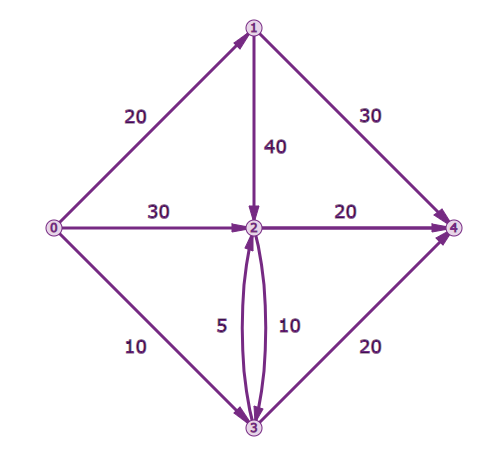


Поток — это присвоение каждой дуге неотрицательного числа (величины потока), которое удовлетворяет следующему правилу сохранения потока: *В каждом узле, кроме источника или приемника, общий поток всех дуг, ведущих в узел, равен общему потоку всех дуг, выходящих из него*

Задача максимального потока состоит в том, чтобы найти поток, для которого сумма величин потока для всей сети будет как можно большей.

В следующих разделах представлены программы для поиска максимального расхода от источника (0) к стоку (4).

## Математическая постановка задаи

Описание постановка задачи о максимальном потоке:

1. Ориентированный граф $G=(V,E)$:
- $V$ — множество вершин.
- $E$ — множество рёбер.

2. Вершины:
- $s$ — исток (начальная вершина).
- $t$ — сток (конечная вершина).

3. Пропускная способность рёбер:
- Каждое ребро $(u,v)∈E$ имеет пропускную способность $c(u,v)$.

4. Поток по рёбрам:
- Поток по ребру $(u,v)∈E$ обозначается как $f(u,v)$.

5. Остаточная сеть:
- Остаточная сеть $G_f$  — это граф, полученный из $G$ после вычитания текущего потока из пропускной способности рёбер.

6. Задача:
- Найти поток $f$, который максимизирует поток из истока $s$ в сток $t$, при этом соблюдая ограничения на пропускную способность рёбер.

7. Алгоритм Форда-Фалкерсона:
- Инициализировать поток $f$ как нулевой.
- Находить пути из $s$ в $t$ в остаточной сети $G_f$.
- Пропускать поток по найденному пути, равный минимальной пропускной способности рёбер на этом пути.
- Обновлять остаточную сеть после каждого изменения потока.
- Повторять до тех пор, пока не будет найден путь из $s$ в $t$ в остаточной сети.

Таким образом, задача о максимальном потоке заключается в нахождении максимального количества потока, которое можно пропустить из истока в сток, соблюдая ограничения на пропускную способность рёбер.

**Математическая постановка задачи о максимальном потоке в виде формулы выглядит следующим образом**:

1. **Целевая функция**:
   - $\text{maximize} \sum_{(u, v) \in E} f(u, v)$

2. **Ограничения на пропускную способность**:
   - $0 \leq f(u, v) \leq c(u, v)$ для всех $(u, v) \in E$

3. **Сохранение потока**:
   - Для всех вершин $v \in V \setminus \{s, t\}$:
     - $\sum_{(u, v) \in E} f(u, v) = \sum_{(v, w) \in E} f(v, w)$

4. **Поток из истока**:
   - $\sum_{(s, v) \in E} f(s, v) = \text{поток из истока}$

5. **Поток в сток**:
   - $\sum_{(v, t) \in E} f(v, t) = \text{поток в сток}$

Таким образом, задача о максимальном потоке заключается в нахождении такого распределения потока $f$ по рёбрам графа $G$, чтобы максимизировать общий поток из истока $s$ в сток $t$, соблюдая ограничения на пропускную способность рёбер и сохраняя баланс потока в вершинах, отличных от истока и стока.

## Импортируем библиотеки
Следующий код импортирует необходимую библиотеку.

In [2]:
!pip install ortools

ERROR: Could not find a version that satisfies the requirement ortools (from versions: none)
ERROR: No matching distribution found for ortools


In [ ]:
import numpy as np
from ortools.graph.python import max_flow

## Объявляем решатель
Для решения задачи можно использовать решатель SimpleMaxFlow.

In [ ]:
# Создаем экземпляр решателя SimpleMaxFlow
smf = max_flow.SimpleMaxFlow()

In [ ]:
start_nodes = np.array([0, 0, 0, 1, 1, 2, 2, 3, 3])
end_nodes =   np.array([1, 2, 3, 2, 4, 3, 4, 2, 4])
capacities = np.array([20, 30, 10, 40, 30, 10, 20, 5, 20])

## Определим данные

Вы определяете граф для задачи с тремя массивами для начальных узлов, конечных узлов и пропускных способностей дуг. Длина каждого массива равна количеству дуг в графе.

Для каждого i дуга i идет от start_nodes[i] до end_nodes[i] , а ее пропускная способность задается capacities[i] . В следующем разделе показано, как создавать дуги, используя эти данные.

In [ ]:
# Определим три параллельных массива: start_nodes, end_nodes и емкости
# между каждой парой. Например, дуга от узла 0 до узла 1 имеет емкость 20.
start_nodes = np.array([0, 0, 0, 1, 1, 2, 2, 3, 3])
end_nodes =   np.array([1, 2, 3, 2, 4, 3, 4, 2, 4])
capacities = np.array([20, 30, 10, 40, 30, 10, 20, 5, 20])

## Добавим дуги

Для каждого начального узла и конечного узла вы создаете дугу от начального узла до конечного узла с заданной емкостью, используя метод AddArcWithCapacity. Возможности являются ограничениями для проблемы.

In [ ]:
# Добавляйте дуги массово.
# примечание: можно использовать add_arc_with_capacity (начало, конец, емкость)
all_arcs = smf.add_arcs_with_capacity(start_nodes, end_nodes, capacities)

# Вызов решателя

Теперь, когда все дуги определены, остается только вызвать решатель и отобразить результаты. Вы вызываете метод Solve() , предоставляя источник (0) и приемник (4).

In [ ]:
# НайдЕМ максимальный поток между узлом 0 и узлом 4.
status = smf.solve(0, 4)

## Отображение результатов

Теперь вы можете отображать поток по каждой дуге.

In [ ]:
if status != smf.OPTIMAL:
    print("Возникла проблема с максимальным расходом на входе.")
    print(f"Статус: {status}")
    exit(1)
print("Максимальный поток:", smf.optimal_flow())
print("")
print("Дуга (ребро)  Потоко / Пропускная способность")
solution_flows = smf.flows(all_arcs)
for arc, flow, capacity in zip(all_arcs, solution_flows, capacities):
    print(f"{smf.tail(arc)} -> {smf.head(arc)}   {flow:3}  / {capacity:3}")
#print("Минимальное разрез со стороны источника:", smf.get_source_side_min_cut())
#print("Минимальный разрез на стороне стока", smf.get_sink_side_min_cut())